In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from rsnn.constants import *

In [3]:
rng = np.random.default_rng(1801)

# Generate spike train and synaptic connections at random

In [4]:
from rsnn.rand import *

In [5]:
n_neurons = 100
period, f_rate = 50.0, 1.0

In [6]:
# spikes_0 = rand_spikes(n_neurons, 50.0, 1.0, rng)
# spikes_0 = spikes_0.with_columns(pl.lit(0, pl.UInt32).alias("index"))
# spikes_1 = rand_spikes(n_neurons, 40.0, 0.5, rng)
# spikes_1 = spikes_1.with_columns(pl.lit(1, pl.UInt32).alias("index"))
# spikes = pl.concat([spikes_0, spikes_1])
# spikes,

spikes = rand_spikes(n_neurons, period, f_rate, rng)
spikes = spikes.with_columns(pl.lit(0, pl.UInt32).alias("index"))

In [7]:
n_synapses = 50_000
synapses = rand_synapses(n_neurons, n_synapses, 1.0, 10.0, rng)
# synapses = rand_synapses_fin(n_neurons, n_synapses, 0.1, 10.0, rng)
# synapses = rand_synapses_fout(n_neurons, n_synapses, 0.1, 10.0, rng)
# synapses = rand_synapses_fin_fout(n_neurons, n_synapses, 0.1, 10.0, rng)
# synapses = rand_synapses_fc(n_neurons, 0.1, 10.0, rng)

# print(f"in-synapses: {synapses.group_by('target').agg(pl.len()).drop('target').describe(percentiles=None)}")
# print(f"out-synapses: {synapses.group_by('source').agg(pl.len()).drop('source').describe(percentiles=None)}")
print(f"synapses: {synapses}")

synapses: shape: (50_000, 6)
┌────────┬────────┬──────────┬────────┬───────────┬───────────┐
│ source ┆ target ┆ delay    ┆ weight ┆ in_coef_0 ┆ in_coef_1 │
│ ---    ┆ ---    ┆ ---      ┆ ---    ┆ ---       ┆ ---       │
│ u32    ┆ u32    ┆ f64      ┆ f64    ┆ f64       ┆ f64       │
╞════════╪════════╪══════════╪════════╪═══════════╪═══════════╡
│ 86     ┆ 86     ┆ 2.345999 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 44     ┆ 60     ┆ 8.715286 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 93     ┆ 88     ┆ 2.939877 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 34     ┆ 40     ┆ 2.679306 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 16     ┆ 79     ┆ 3.496688 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ …      ┆ …      ┆ …        ┆ …      ┆ …         ┆ …         │
│ 56     ┆ 87     ┆ 6.160218 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 27     ┆ 48     ┆ 5.361969 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 54     ┆ 53     ┆ 2.239565 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 43     ┆ 28     ┆ 8.155788 ┆ 0.0    ┆ 0.0       ┆ 1.0       │
│ 2      ┆ 

# Optimize synaptic weights

In [8]:
from rsnn.learning.energy_based import *
from rsnn.learning.utils import *

In [9]:
out_spikes_, synapses_, states_ = init_energy_based_optimization(spikes, synapses.filter(pl.col("target") == 42))

In [10]:
states_.sort("start")

index,neuron,f_index,start,in_index,weight,in_coef_0,in_coef_1,length
u32,u32,u32,f64,u32,f64,f64,f64,f64
0,42,0,-3.084585,null,-1.0,1.0,0.0,4.052536
0,42,0,-3.08076,248,0.0,0.0,1.0,1.409712
0,42,0,-3.075683,176,0.0,0.0,1.0,3.234241
0,42,0,-3.065652,372,0.0,0.0,1.0,1.798858
0,42,0,-3.061117,394,0.0,0.0,1.0,null
…,…,…,…,…,…,…,…,…
0,42,16,46.89778,87,0.0,0.0,1.0,null
0,42,16,46.89829,453,0.0,0.0,1.0,null
0,42,16,46.900434,296,0.0,0.0,1.0,null


In [11]:
out_spikes_

f_index,neuron,time,period,index,prev_time
u32,u32,f64,f64,u32,f64
0,42,0.967951,50.0,0,-3.084585
1,42,4.16675,50.0,0,0.967951
2,42,5.349934,50.0,0,4.16675
3,42,6.554838,50.0,0,5.349934
4,42,9.641295,50.0,0,6.554838
…,…,…,…,…,…
12,42,33.909972,50.0,0,27.958702
13,42,35.466293,50.0,0,33.909972
14,42,42.689379,50.0,0,35.466293


In [ ]:
states_ = states_.drop_nulls("length")

rec_states = states_.filter(pl.col("in_index").is_null()).select(
    "f_index", "start", "weight"
)
syn_states = states_.filter(pl.col("in_index").is_not_null()).select(
    "f_index", "start", "in_index"
)

rec_to_syn_metric = (
    rec_states.join(syn_states, on="f_index", suffix="_other")
    .join(out_spikes_.select("f_index", "time"), on="f_index")
    .with_columns(
        rp.energy_rec_to_syn_metric("time", "start", "start_other").alias("metric")
    )
    .group_by("in_index")
    .agg((pl.col("metric") * pl.col("weight")).sum())
)

syn_to_syn_metric = (
    syn_states.join(syn_states, on="f_index", suffix="_other")
    .join(out_spikes_.select("f_index", "time"), on="f_index")
    .with_columns(
        rp.energy_syn_to_syn_metric("time", "start", "start_other").alias("metric")
    )
    .group_by("in_index", "in_index_other")
    .agg(pl.sum("metric"))
)

xi = rec_to_syn_metric.sort("in_index").get_column("metric").to_numpy()
W = sparse.csr_array(
    (
        (syn_to_syn_metric.get_column("metric").to_numpy()),
        (
            syn_to_syn_metric.get_column("in_index").to_numpy(),
            syn_to_syn_metric.get_column("in_index_other").to_numpy(),
        ),
    ),
    shape=(synapses_.height, synapses_.height),
)

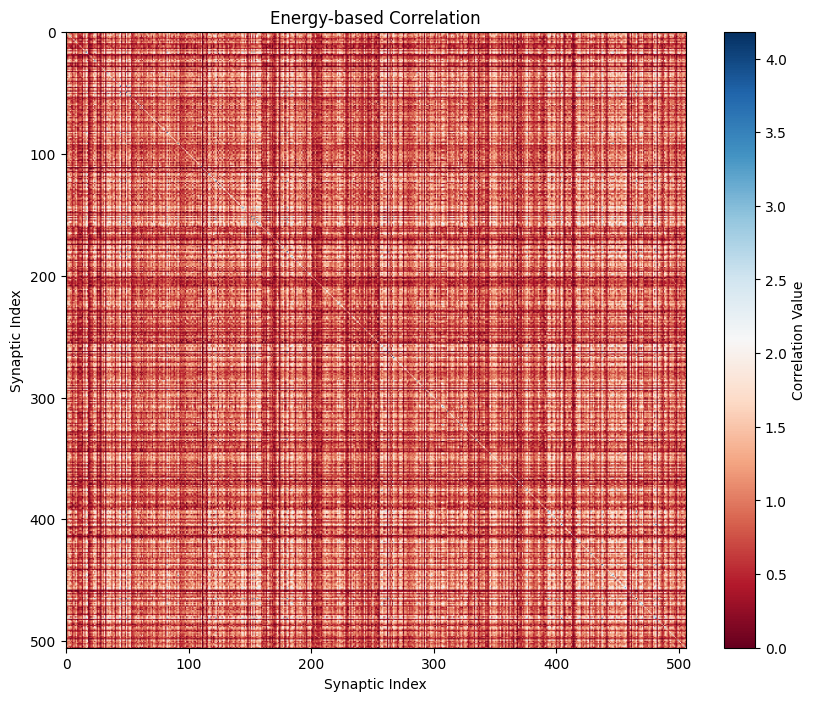

In [25]:
plt.figure(figsize=(10, 8))
# Normalize to get correlation matrix
plt.imshow(W.todense(), cmap='RdBu', aspect='auto')
# plt.imshow(neuron.solver.Wbxt_N, cmap='RdBu', aspect='auto', vmin=-np.max(np.abs(neuron.solver.Wbxt_N)), vmax=np.max(np.abs(neuron.solver.Wbxt_N)))
plt.colorbar(label='Correlation Value')
plt.title('Energy-based Correlation')
plt.xlabel('Synaptic Index')
plt.ylabel('Synaptic Index')
plt.show()

In [12]:
synapses_ = continuous_optimization(spikes, synapses)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-10


2025-09-02 15:44:24.224' - DEBUG - Neuron 86. Learnable weights initialized.
2025-09-02 15:44:24.225' - DEBUG - Neuron 86. Objective function set.
2025-09-02 15:44:24.230' - DEBUG - Neuron 86. Firing constraints added.
2025-09-02 15:44:24.244' - DEBUG - Neuron 86: iteration 0. The objective is 0.36054650551280176 for 16 linear constraints. Still 30 linear potential constraints to add.
2025-09-02 15:44:24.261' - DEBUG - Neuron 86: iteration 1. The objective is 10.240846776618259 for 46 linear constraints. Still 9 linear potential constraints to add.
2025-09-02 15:44:24.281' - DEBUG - Neuron 86: iteration 2. The objective is 12.568044970007278 for 55 linear constraints. Still 6 linear potential constraints to add.
2025-09-02 15:44:24.298' - DEBUG - Neuron 86: iteration 3. The objective is 14.760907227771453 for 61 linear constraints. Still 3 linear potential constraints to add.
2025-09-02 15:44:24.320' - DEBUG - Neuron 86: iteration 4. The objective is 15.086742659502942 for 64 linear co

In [13]:
# opt_spikes, opt_synapses, opt_active_states, opt_silent_states = init_continuous_optimization(spikes, synapses.filter(pl.col("target") == 42), 0.2)

In [ ]:
eps = 0.2

opt_spikes, opt_synapses, opt_states = init_offline_optimization(
    spikes, synapses.filter(pl.col("target") == 42)
)

# # active states
# v_states = (
#     opt_states.select("f_index", "in_index", "weight")
#     # .filter(pl.col("in_index").is_not_null() | (pl.col("weight").abs() > 0.0))
#     .unique().join(
#         opt_spikes.select(
#             pl.col("index"),
#             pl.col("neuron"),
#             pl.col("f_index"),
#             (pl.col("time") - 0.2).clip(pl.col("time_prev")).alias("start"),
#             pl.lit(True, pl.Boolean).alias("active"),
#         ),
#         on="f_index",
#     )
#     # .with_columns(
#     #     (pl.col("")).over(["f_index", "in_index"]).alias("coef_0"),
#     #     pl.lit(0.0, pl.Float64).alias("coef_1"),
#     # )
# )

# v_states.join(opt_states, on=["f_index", "in_index"], suffix="_prev").filter(
#     pl.col("start_prev") <= pl.col("start")
# ).group_by("f_index", "in_index").agg(
#     (
#         (pl.col("coef_0") + pl.col("coef_1") * (pl.col("start") - pl.col("start_prev")))
#         * (pl.col("start_prev") - pl.col("start")).exp()
#     )
#     .sum()
#     .alias("coef_0"),
#     (pl.col("coef_1") * (pl.col("start_prev") - pl.col("start")).exp())
#     .sum()
#     .alias("coef_1"),
# )

# v_states = (
#     opt_states.select("f_index", "in_index", "weight")
#     # .filter(pl.col("in_index").is_not_null() | (pl.col("weight").abs() > 0.0))
#     .unique().join(
#         opt_spikes.select(
#             pl.col("index"),
#             pl.col("neuron"),
#             pl.col("f_index"),
#             (pl.col("time") - 0.2).clip(pl.col("time_prev")).alias("start"),
#             pl.lit(True, pl.Boolean).alias("active"),
#         ),
#         on="f_index",
#     )
#     # .with_columns(
#     #     (pl.col("")).over(["f_index", "in_index"]).alias("coef_0"),
#     #     pl.lit(0.0, pl.Float64).alias("coef_1"),
#     # )
# )

v_states = (
    opt_spikes.select(
        pl.col("index"),
        pl.col("neuron"),
        pl.col("f_index"),
        (pl.col("time") - eps).clip(pl.col("time_prev")).alias("start"),
    )
    .join(
        opt_states.filter(
            (pl.col("coef_1").abs() > 0.0) | (pl.col("coef_0").abs() > 0.0)
        ),
        on="f_index",
        suffix="_prev",
    )
    .select(
        pl.col("index"),
        pl.col("neuron"),
        pl.col("f_index"),
        pl.col("in_index"),
        pl.col("start"),
        (pl.col("start") - pl.col("start_prev")).alias("delta"),
        pl.col("weight"),
        pl.col("coef_0"),
        pl.col("coef_1"),
    )
    .filter(pl.col("delta") >= 0.0)
)
v_states = (
    v_states.group_by("index", "neuron", "f_index", "in_index", "start", "weight")
    .agg(
        (
            (pl.col("coef_0") + pl.col("coef_1") * pl.col("delta"))
            * (-pl.col("delta")).exp()
        )
        .sum()
        .alias("coef_0"),
        (pl.col("coef_1") * (-pl.col("delta")).exp()).sum().alias("coef_1"),
    )
    .with_columns(pl.lit(True, pl.Boolean).alias("active"))
)

all_states = (
    opt_states.with_columns(pl.lit(None, pl.Boolean).alias("active"))
    .match_to_schema(v_states.schema, missing_columns="insert")
    .extend(v_states)
    .with_columns(
        pl.col("active")
        .forward_fill()
        .fill_null(False)
        .over(["f_index", "in_index"], order_by="start"),
        pl.col("start")
        .diff()
        .shift(-1)
        .over(["f_index", "in_index"], order_by="start")
        .alias("length"),
    )
)

active_states = all_states.filter(pl.col("active") == True)
silent_states = all_states.filter(pl.col("active") == False)

# active_states.filter((pl.col("f_index") == 7) & (pl.col("in_index").is_null())).sort("start"), 
silent_states.filter((pl.col("f_index") == 7) & (pl.col("in_index").is_null())).sort("start")

ColumnNotFoundError: unable to find column "coef_1"; valid columns: ["index", "neuron", "f_index", "start", "in_index", "weight", "in_coef_0", "in_coef_1"]

In [ ]:
opt_states.filter((pl.col("in_index") == 20) & (pl.col("f_index") == 12)), opt_spikes.filter(pl.col("f_index") == 12)

(shape: (3, 8)
 ┌───────┬────────┬─────────┬───────────┬──────────┬────────┬────────┬────────┐
 │ index ┆ neuron ┆ f_index ┆ start     ┆ in_index ┆ weight ┆ coef_0 ┆ coef_1 │
 │ ---   ┆ ---    ┆ ---     ┆ ---       ┆ ---      ┆ ---    ┆ ---    ┆ ---    │
 │ u32   ┆ u32    ┆ u32     ┆ f64       ┆ u32      ┆ f64    ┆ f64    ┆ f64    │
 ╞═══════╪════════╪═════════╪═══════════╪══════════╪════════╪════════╪════════╡
 │ 0     ┆ 42     ┆ 12      ┆ 35.681965 ┆ 20       ┆ 0.0    ┆ 0.0    ┆ 1.0    │
 │ 0     ┆ 42     ┆ 12      ┆ 37.332964 ┆ 20       ┆ 0.0    ┆ 0.0    ┆ 1.0    │
 │ 0     ┆ 42     ┆ 12      ┆ 37.366982 ┆ 20       ┆ 0.0    ┆ 0.0    ┆ 0.0    │
 └───────┴────────┴─────────┴───────────┴──────────┴────────┴────────┴────────┘,
 shape: (1, 6)
 ┌─────────┬────────┬───────────┬────────┬───────┬───────────┐
 │ f_index ┆ neuron ┆ time      ┆ period ┆ index ┆ prev_time │
 │ ---     ┆ ---    ┆ ---       ┆ ---    ┆ ---   ┆ ---       │
 │ u32     ┆ u32    ┆ f64       ┆ f64    ┆ u32   ┆ f64      

In [ ]:
opt_spikes

f_index,neuron,time,period,index,prev_time
u32,u32,f64,f64,u32,f64
0,42,0.967951,50.0,0,-3.084585
1,42,4.16675,50.0,0,0.967951
2,42,5.349934,50.0,0,4.16675
3,42,6.554838,50.0,0,5.349934
4,42,9.641295,50.0,0,6.554838
…,…,…,…,…,…
12,42,33.909972,50.0,0,27.958702
13,42,35.466293,50.0,0,33.909972
14,42,42.689379,50.0,0,35.466293


In [ ]:
opt_synapses

in_index,source,target,delay,weight,coef_0,coef_1
u32,u32,u32,f64,f64,f64,f64
0,13,42,3.772486,0.0,0.0,1.0
1,55,42,5.535422,0.0,0.0,1.0
2,41,42,3.254223,0.0,0.0,1.0
3,35,42,7.71846,0.0,0.0,1.0
4,94,42,4.815046,0.0,0.0,1.0
…,…,…,…,…,…,…
501,88,42,8.532453,0.0,0.0,1.0
502,14,42,6.650624,0.0,0.0,1.0
503,35,42,9.855197,0.0,0.0,1.0


In [ ]:
opt_active_states

f_index,in_index,weight,index,neuron,start,active,coef_0,coef_1,length,cum_coef_1,cum_coef_0
u32,u32,f64,u32,u32,f64,bool,f64,f64,f64,f64,f64
0,219,0.0,0,42,0.767951,true,0.0,0.0,0.2,0.212884,0.4419
0,256,0.0,0,42,0.767951,true,0.0,0.0,0.2,0.351919,0.499149
0,9,0.0,0,42,0.767951,true,0.0,0.0,0.2,0.026863,0.097163
0,423,0.0,0,42,0.767951,true,0.0,0.0,0.2,0.141352,0.276555
0,111,0.0,0,42,0.767951,true,0.0,0.0,0.2,0.563216,0.323338
…,…,…,…,…,…,…,…,…,…,…,…
16,361,0.0,0,42,46.889299,true,0.0,1.0,0.026117,1.0,0.0
16,87,0.0,0,42,46.89778,true,0.0,1.0,0.017636,1.253768,0.348001
16,453,0.0,0,42,46.89829,true,0.0,1.0,0.017125,1.248974,0.346175


In [ ]:
opt_silent_states

f_index,in_index,weight,index,neuron,start,active,coef_0,coef_1,length,cum_coef_1,cum_coef_0
u32,u32,f64,u32,u32,f64,bool,f64,f64,f64,f64,f64
0,null,-1.0,0,42,-3.084585,false,1.0,0.0,3.852536,0.0,1.0
0,248,0.0,0,42,-3.08076,false,0.0,1.0,1.409712,1.0,0.0
0,176,0.0,0,42,-3.075683,false,0.0,1.0,3.234241,1.0,0.0
0,372,0.0,0,42,-3.065652,false,0.0,1.0,1.798858,1.0,0.0
0,394,0.0,0,42,-3.061117,false,0.0,1.0,3.829068,1.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…
16,199,0.0,0,42,46.675276,false,0.0,1.0,0.04014,1.287568,0.358395
16,152,0.0,0,42,46.679953,false,0.0,1.0,0.035462,1.0,0.0
16,362,0.0,0,42,46.691249,false,0.0,1.0,0.024167,1.293588,0.359815


In [ ]:
synapses = continuous_optimization(spikes, synapses)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-10


2025-09-02 08:10:33.937' - WARNING - active_states: shape: (5_966, 12)
┌─────────┬──────────┬────────┬───────┬───┬────────┬──────────┬────────────┬────────────┐
│ f_index ┆ in_index ┆ weight ┆ index ┆ … ┆ coef_1 ┆ length   ┆ cum_coef_1 ┆ cum_coef_0 │
│ ---     ┆ ---      ┆ ---    ┆ ---   ┆   ┆ ---    ┆ ---      ┆ ---        ┆ ---        │
│ u32     ┆ u32      ┆ f64    ┆ u32   ┆   ┆ f64    ┆ f64      ┆ f64        ┆ f64        │
╞═════════╪══════════╪════════╪═══════╪═══╪════════╪══════════╪════════════╪════════════╡
│ 0       ┆ 75       ┆ 0.0    ┆ 0     ┆ … ┆ 0.0    ┆ 0.2      ┆ 0.809574   ┆ 0.17102    │
│ 0       ┆ 64       ┆ 0.0    ┆ 0     ┆ … ┆ 0.0    ┆ 0.2      ┆ 0.499523   ┆ 0.34672    │
│ 0       ┆ 415      ┆ 0.0    ┆ 0     ┆ … ┆ 0.0    ┆ 0.2      ┆ 0.420074   ┆ 0.36434    │
│ 0       ┆ 105      ┆ 0.0    ┆ 0     ┆ … ┆ 0.0    ┆ 0.2      ┆ 0.627782   ┆ 0.292271   │
│ 0       ┆ 429      ┆ 0.0    ┆ 0     ┆ … ┆ 0.0    ┆ 0.2      ┆ 0.333557   ┆ 0.366226   │
│ …       ┆ …        ┆ …     


Interrupt request received


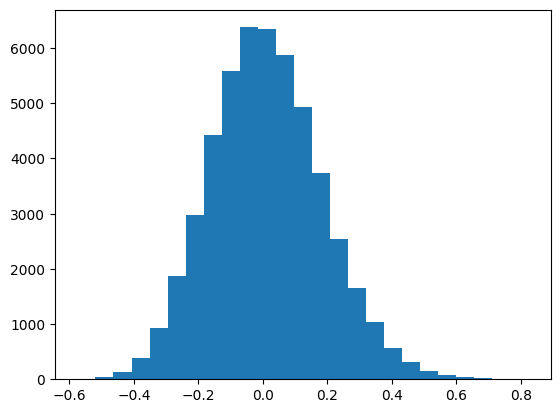

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.hist(synapses["weight_1"].to_numpy(), bins=25)
# res = ax.set_xlabel("weight")
# res = ax.set_ylabel("count")

# Evaluate asymptotic stability

In [ ]:
from rsnn.learning.jitters import *

In [ ]:
Phi = compute_phi_matrix(spikes.filter(pl.col("index")==0), synapses)

In [ ]:
top_phis = compute_non_global_phi_eigenvals(Phi, k=1)
np.abs(top_phis)

array([0.00014559])

Text(0, 0.5, 'Im')

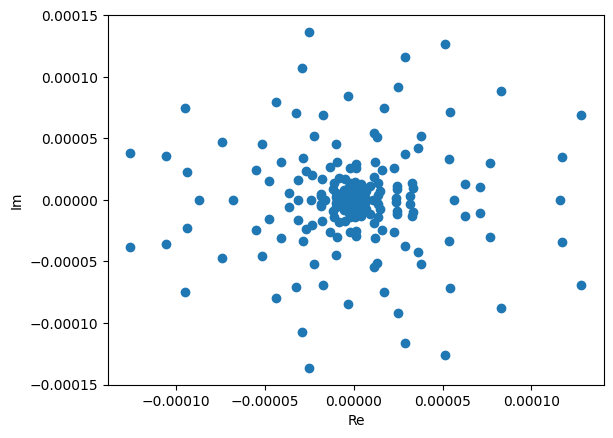

In [ ]:
top_phis = compute_non_global_phi_eigenvals(Phi, k=250)
plt.plot(top_phis.real, top_phis.imag, "o")
plt.xlabel("Re")
plt.ylabel("Im")

# Simulate network

In [ ]:
from rsnn.sim import simulate, create_initial_states
from rsnn.channels import compute_min_delays

In [ ]:
# Fastest communications due to synaptic connections
min_delays = compute_min_delays(n_neurons, synapses)

In [ ]:
std_jitter = 1e-1  # the lower the spectral radius, the largest this quantity can be
spikes_ref = spikes.filter(pl.col("index") == 0).select("neuron", "time", "period").sort("time")
initial_drift = rng.normal(0.0, std_jitter, spikes_ref.height)
spikes_sim = spikes_ref.select(
    pl.col("neuron"),
    pl.col("time") - period + initial_drift,
)

# Initial neuron states (last firing times and firing thresholds)
# f_thresh_noise = lambda n: FIRING_THRESHOLD
f_thresh_noise = lambda n: rng.normal(FIRING_THRESHOLD, 0.1, n)
neurons = pl.DataFrame(
    {
        "neuron": np.arange(n_neurons, dtype=np.uint32),
        "f_thresh": f_thresh_noise(n_neurons),
    }
)
neurons = neurons.with_columns(pl.lit(None, pl.Float64).alias("last_f_time"))
neurons = neurons.update(
    spikes_sim.group_by("neuron").agg(pl.max("time").alias("last_f_time")), on="neuron"
)

In [ ]:
# Initial states
states_sim = create_initial_states(neurons, spikes_sim, synapses)

In [ ]:
spikes_sim, states_sim = simulate(
    neurons,
    spikes_sim,
    synapses,
    min_delays,
    states_sim,
    period,
    10 * period,
    f_thresh_noise=f_thresh_noise,
)

2025-08-28 14:50:10.410' - DEBUG - Simulation time: 0.026283375378925722
2025-08-28 14:50:10.423' - DEBUG - Simulation time: 1.2163614595858736
2025-08-28 14:50:10.435' - DEBUG - Simulation time: 2.2576923351568463
2025-08-28 14:50:10.449' - DEBUG - Simulation time: 3.543257764195141
2025-08-28 14:50:10.464' - DEBUG - Simulation time: 4.712588492498307
2025-08-28 14:50:10.477' - DEBUG - Simulation time: 5.977727158665862
2025-08-28 14:50:10.489' - DEBUG - Simulation time: 7.064953771852568
2025-08-28 14:50:10.501' - DEBUG - Simulation time: 8.279290411609585
2025-08-28 14:50:10.512' - DEBUG - Simulation time: 9.500177912221682
2025-08-28 14:50:10.523' - DEBUG - Simulation time: 10.551534382049104
2025-08-28 14:50:10.535' - DEBUG - Simulation time: 11.72225458586943
2025-08-28 14:50:10.546' - DEBUG - Simulation time: 12.90876418556738
2025-08-28 14:50:10.558' - DEBUG - Simulation time: 14.21987765513291
2025-08-28 14:50:10.574' - DEBUG - Simulation time: 15.474281883197241
2025-08-28 14

In [ ]:
from rsnn.metrics import compute_similarities

In [ ]:
similarities = []

for i in range(0, 10):
    spikes_window = spikes_sim.filter(
        pl.col("time").is_between(i * period, (i + 1) * period, closed="left")
    )
    shifts = (
        spikes_window.join(spikes_ref, on="neuron", suffix="_ref")
        .select((pl.col("time_ref") - pl.col("time")).round(3).alias("delta"))
        .unique()
        .filter(pl.col("delta").is_between(-1.0 - i * period, 1.0 - i * period))
    )
    precisions, recalls = compute_similarities(
        spikes_window, spikes_ref, shifts, n_neurons
    )
    best_precision = precisions.top_k(1, by="meas_precision")
    best_recall = recalls.top_k(1, by="meas_recall")

    similarities.append(
        pl.DataFrame({"cycle": [i]})
        .join(best_precision, how="cross")
        .join(best_recall, how="cross")
    )
similarities = pl.concat(similarities).sort("cycle")
similarities,

(shape: (10, 5)
 ┌───────┬─────────────────┬────────────────┬──────────────┬─────────────┐
 │ cycle ┆ delta_precision ┆ meas_precision ┆ delta_recall ┆ meas_recall │
 │ ---   ┆ ---             ┆ ---            ┆ ---          ┆ ---         │
 │ i64   ┆ f64             ┆ f64            ┆ f64          ┆ f64         │
 ╞═══════╪═════════════════╪════════════════╪══════════════╪═════════════╡
 │ 0     ┆ 0.076           ┆ 0.927823       ┆ 0.076        ┆ 0.927823    │
 │ 1     ┆ -49.902         ┆ 0.944425       ┆ -49.902      ┆ 0.944425    │
 │ 2     ┆ -99.877         ┆ 0.93948        ┆ -99.877      ┆ 0.93948     │
 │ 3     ┆ -149.846        ┆ 0.944402       ┆ -149.846     ┆ 0.943873    │
 │ 4     ┆ -199.817        ┆ 0.942961       ┆ -199.817     ┆ 0.942961    │
 │ 5     ┆ -249.781        ┆ 0.938148       ┆ -249.781     ┆ 0.937045    │
 │ 6     ┆ -299.747        ┆ 0.944587       ┆ -299.747     ┆ 0.944587    │
 │ 7     ┆ -349.709        ┆ 0.940555       ┆ -349.709     ┆ 0.940555    │
 │ 8     

In [ ]:
raise ValueError("STOP")

ValueError: STOP

# Visualizations for the thesis

- Weight distributions
- Number of violations vs iterations
- Constraints correlations in the weights norm

NameError: name 'syn_weights' is not defined

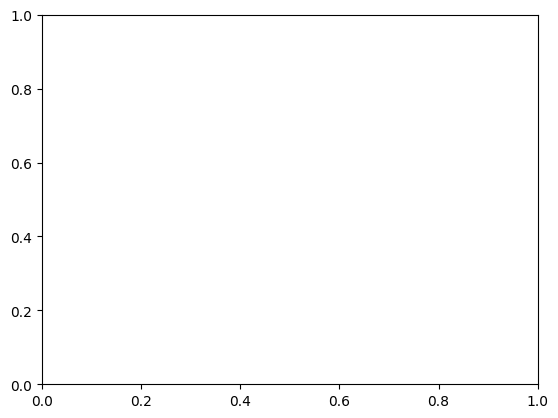

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.hist(syn_weights.X, bins=100, density=True)
res = ax.set_xlabel("weight")
res = ax.set_ylabel("frequency")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(syn_weights.X, plot=ax)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

slack = np.array(model.getAttr("Slack"))
res = ax.hist(np.abs(slack), bins=100, density=True)
res = ax.set_xlabel("slack")
res = ax.set_ylabel("frequency")

In [ ]:
A = model.getA()
W = A @ A.T

std_diag = np.sqrt(W.diagonal())
correlation_matrix = W / (std_diag[:, np.newaxis] * std_diag[np.newaxis, :])
correlation_matrix = correlation_matrix.todense()
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(correlation_matrix, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
# plt.imshow(neuron.solver.Wbxt_N, cmap='RdBu', aspect='auto', vmin=-np.max(np.abs(neuron.solver.Wbxt_N)), vmax=np.max(np.abs(neuron.solver.Wbxt_N)))
plt.colorbar(label='Correlation Value', ax=ax)
# plt.title('Constraint Correlations (Wbxt_N)')
# plt.xlabel('Constraint Index')
# plt.ylabel('Constraint Index')
# plt.show()

# Input Signals

In [ ]:
n_in_channels = 6
n_in_times = 20
f_thresh = FIRING_THRESHOLD
zmax, dzmin = 0.0, 1e-2
eps = 0.5
f_time = 5.0
in_times = np.random.uniform(0.0, f_time, size=n_in_times)
in_channels = (np.random.randint(0, n_in_channels, size=n_in_times))

In [ ]:
start, length, ck0, ck1 = compute_ck(
    in_times,
    in_channels,
    n_in_channels,
    np.array([f_time, f_time-eps]),
    REFRACTORY_RESET
)

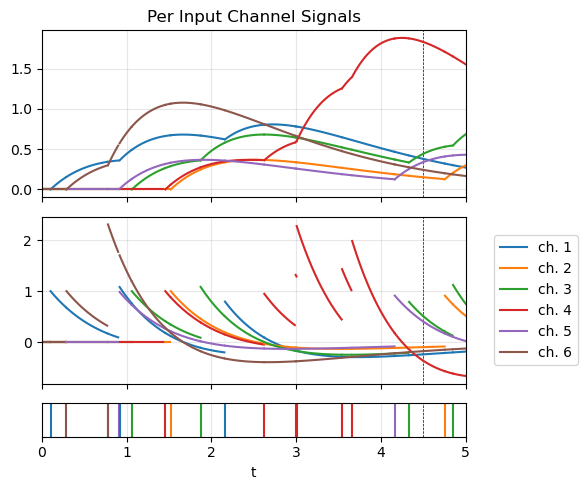

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 5), sharex=True, height_ratios=(5, 5, 1))

for (in_time, in_channel) in zip(in_times, in_channels):
    axes[2].axvline(in_time, color=f'C{in_channel}')

for i in range(3):
    axes[i].axvline(f_time - eps, color=f'black', linewidth=0.5, linestyle='--', label='_nolegend_')

axes[2].set_xlabel('t')
axes[0].set_title('Per Input Channel Signals')
# axes[2].set_ylabel('Spikes')
axes[2].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, f_time)

for start_n, length_n, ck0_n, ck1_n in zip(start, length, ck0, ck1):
    # for k in range(neuron.n_in_channels):
    for k in range(n_in_channels):
        dt_vals = np.arange(0, length_n, 1e-2)
        t_vals = dt_vals + start_n
        y_vals = (ck0_n[k] + ck1_n[k] * dt_vals) * np.exp(-dt_vals)
        axes[0].plot(t_vals, y_vals, c=f"C{k}", linewidth=1.5)

        y_vals = (ck1_n[k] - ck0_n[k] - ck1_n[k] * dt_vals) * np.exp(-dt_vals)
        axes[1].plot(t_vals, y_vals, c=f"C{k}", linewidth=1.5)

axes[1].legend([f"ch. {k+1}" for k in range(n_in_channels)], bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=1)

plt.tight_layout()
plt.show()

# Iterative Constraint Refinement

In [ ]:
def plot_tvc(ax, tc, vc):
    ax.axvline(
        tc,
        color="C1",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        label=rf"$t_c={tc:.2f}$",
    )
    ax.scatter(tc, vc, color="C1", s=30)
    ax.legend()

def plot_z_template(neuron, ax, f_time, eps, f_thresh, zmax):
    for start, length, c0, c1 in zip(
        neuron.z_start, neuron.z_length, neuron.z_c0, neuron.z_c1
    ):
        dt_vals = np.arange(0, length, 1e-3)
        t_vals = dt_vals + start
        y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
        ax.plot(t_vals, y_vals, linewidth=1.5, c="C0", label="__nolegend_")

    ax.plot(
        np.array([0, f_time - eps]),
        np.full(2,zmax),
        color="C3",
        label="__nolegend_",
    )
    ax.plot(
        np.array([f_time - eps, f_time]),
        np.full(2,f_thresh),
        color="C3",
        label="__nolegend_",
    )

def plot_dz_template(neuron, ax, f_time, eps, dzmin):
    for start, length, c0, c1 in zip(
        neuron.dz_start, neuron.dz_length, neuron.dz_c0, neuron.dz_c1
    ):
        dt_vals = np.arange(0, length, 1e-3)
        t_vals = dt_vals + start
        y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
        ax.plot(t_vals, -y_vals, linewidth=1.5, c="C0", label="__nolegend_")

    ax.plot(
        np.array([f_time - eps, f_time]),
        np.full(2,dzmin),
        color="C3",
        label="__nolegend_",
    )

In [ ]:
n_in_channels = 20
n_in_times = 25
f_thresh = 1.0
zmax, dzmin = 0.0, 0.5
eps = 0.5
period = 10.0
f_time = 0.0
in_times = np.random.uniform(0.0, period, size=n_in_times)
in_channels = (np.random.randint(0, n_in_channels, size=n_in_times))

Converged after 2 iterations
Feasible solution found with cost 1.2090952822652663.
Converged after 4 iterations
Feasible solution found with cost 2.2763077970923473.
Converged after 3 iterations
Feasible solution found with cost 2.4013807716151505.
Converged after 4 iterations
Feasible solution found with cost 3.330631692456987.
Converged after 3 iterations
Feasible solution found with cost 3.367143368154999.
Converged after 3 iterations
Feasible solution found with cost 3.378006594473695.
Converged after 4 iterations
Feasible solution found with cost 3.3880465970777514.
Converged after 4 iterations
Feasible solution found with cost 3.3934949246134836.
Optimal solution found in 8 iterations.


/Users/haguettaz/Desktop/RSNN/src/rsnn/optim.py:108: RuntimeWarning: divide by zero encountered in divide
  ts = np.where(c1 <= 0, 0.0, np.clip(1 - c0 / c1, 0.0, length))
/var/folders/p1/wl8__y5x6jgfhz_d47k5gq9m0000gn/T/ipykernel_10368/3281605761.py:123: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


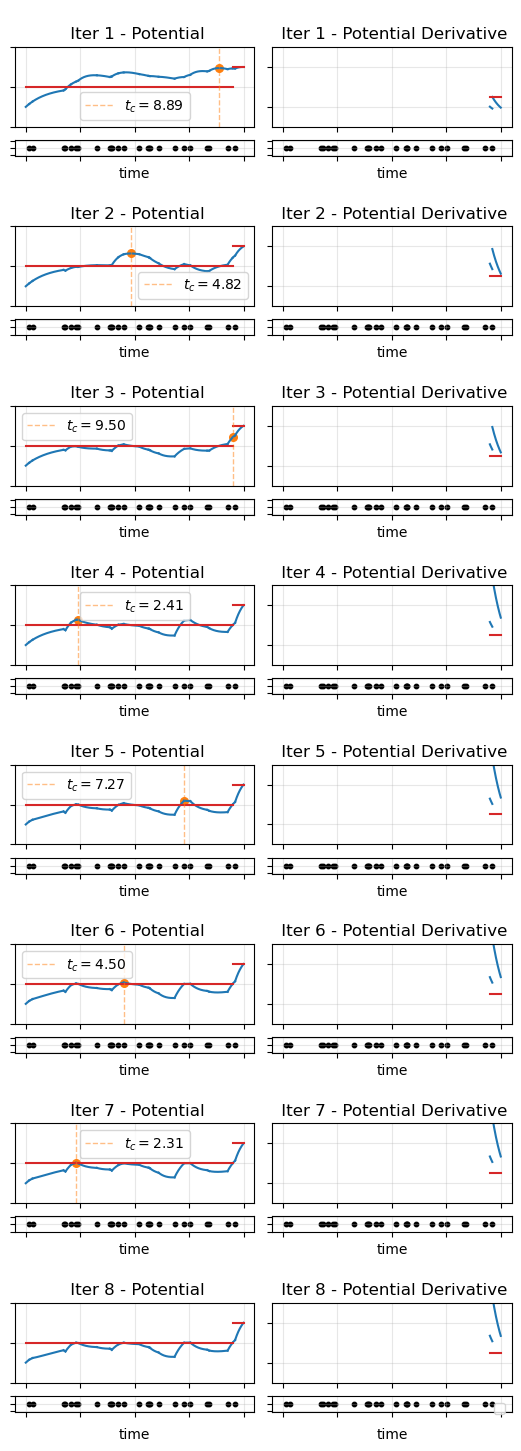

In [ ]:
neuron = Neuron()
feas_tol, conv_tol = 1e-2, 1e-12
n_iter = 8

neuron.init_solver(
    np.array([f_time]),
    in_times,
    in_channels,
    period=period,
    eps=eps,
    zmax=zmax,
    dzmin=dzmin,
    f_thresh=f_thresh,
)

fig, axes = plt.subplots(
    2 * n_iter,
    2,
    figsize=(5.1, 1.8 * (n_iter)),
    sharex=True,
    height_ratios=(1, 0.2) * n_iter,
    layout="constrained",
    gridspec_kw={"hspace": 0.07, "wspace": 0.05},
)

# axes[-1][0].set_xlim(0, 10.0)

# axes[0][1].set_title("Potential Derivative")
# axes[-1][1].set_xlim(0, 10.0)

for i in range(n_iter):
    axes[2*i][0].set_title(f"\n Iter {i+1} - Potential")
    axes[2*i][1].set_title(f"\n Iter {i+1} - Potential Derivative")
    axes[2*i][0].grid(True, alpha=0.3)
    axes[2*i][1].grid(True, alpha=0.3)
    axes[2*i][0].set_ylim(-2, 2)
    axes[2*i][1].set_ylim(-1, 3.0)
    axes[2*i][0].set_xticklabels([])
    axes[2*i][0].set_yticklabels([])
    axes[2*i][1].set_xticklabels([])
    axes[2*i][1].set_yticklabels([])

    axes[2*i+1][0].grid(True, alpha=0.3)
    axes[2*i+1][1].grid(True, alpha=0.3)
    axes[2*i+1][0].set_xticklabels([])
    axes[2*i+1][0].set_yticklabels([])
    axes[2*i+1][1].set_xticklabels([])
    axes[2*i+1][1].set_yticklabels([])

    axes[2*i+1][0].set_xlabel("time")
    axes[2*i+1][1].set_xlabel("time")

    axes[2*i+1][0].scatter(in_times, np.zeros_like(in_times), s=10, color="black", label="_nolegend_")
    axes[2*i+1][1].scatter(in_times, np.zeros_like(in_times), s=10, color="black", label="_nolegend_")

for i in range(n_iter):
    res_dcd = neuron.solver.dbffd(feas_tol, conv_tol)
    if res_dcd == 1:
        neuron.z_c0 = (
            np.inner(neuron.z_ck0[:, :-1], neuron.solver.x) + neuron.z_ck0[:, -1]
        )
        neuron.z_c1 = (
            np.inner(neuron.z_ck1[:, :-1], neuron.solver.x) + neuron.z_ck1[:, -1]
        )
        plot_z_template(neuron, axes[2*i][0], period, eps, f_thresh, zmax)
        
        neuron.dz_c0 = (
            np.inner(neuron.dz_ck0[:, :-1], neuron.solver.x) + neuron.dz_ck0[:, -1]
        )
        neuron.dz_c1 = (
            np.inner(neuron.dz_ck1[:, :-1], neuron.solver.x) + neuron.dz_ck1[:, -1]
        )
        plot_dz_template(neuron, axes[2*i][1], period, eps, dzmin)

        z_imax, z_vmax, z_dtmax = find_maximum_violation(
            neuron.z_c0, neuron.z_c1, neuron.z_length, neuron.z_lim
        )

        dz_imax, dz_vmax, dz_dtmax = find_maximum_violation(
            neuron.dz_c0, neuron.dz_c1, neuron.dz_length, neuron.dz_lim
        )

        if z_vmax <= feas_tol and dz_vmax <= feas_tol:
            print(f"Optimal solution found in {i+1} iterations.")
            break
        else:
            if z_vmax > dz_vmax:
                neuron.solver.add_constraint(
                    (neuron.z_ck0[z_imax, :-1] + z_dtmax * neuron.z_ck1[z_imax, :-1])
                    * np.exp(-z_dtmax),
                    neuron.z_lim[z_imax]
                    - (neuron.z_ck0[z_imax, -1] + z_dtmax * neuron.z_ck1[z_imax, -1])
                    * np.exp(-z_dtmax),
                )
                plot_tvc(
                    axes[2*i][0],
                    neuron.z_start[z_imax] + z_dtmax,
                    z_vmax + neuron.z_lim[z_imax],
                )

            else:
                neuron.solver.add_constraint(
                    (
                        neuron.dz_ck0[dz_imax, :-1]
                        + dz_dtmax * neuron.dz_ck1[dz_imax, :-1]
                    )
                    * np.exp(-dz_dtmax),
                    neuron.dz_lim[dz_imax]
                    - (
                        neuron.dz_ck0[dz_imax, -1]
                        + dz_dtmax * neuron.dz_ck1[dz_imax, -1]
                    )
                    * np.exp(-dz_dtmax),
                )
                plot_tvc(
                    axes[2*i][1],
                    neuron.dz_start[dz_imax] + dz_dtmax,
                    -dz_vmax - neuron.dz_lim[dz_imax],
                )
    else:
        break

plt.legend()
# plt.tight_layout()
plt.show()

# `Neuron.learn()`

In [ ]:
# def plot_z_template(neuron, ax, f_time, eps, f_thresh, zmax):
#     for start, length, c0, c1 in zip(
#         neuron.z_start, neuron.z_length, neuron.z_c0, neuron.z_c1
#     ):
#         dt_vals = np.arange(0, length, 1e-2)
#         t_vals = dt_vals + start
#         y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
#         ax.plot(t_vals, y_vals, linewidth=1.5, c="C0", label="__nolegend_")

#     ax.plot(
#         np.array([0, f_time - eps]),
#         np.full(2,zmax),
#         color="C4",
#         label="__nolegend_",
#     )
#     ax.plot(
#         np.array([f_time - eps, f_time]),
#         np.full(2,f_thresh),
#         color="C4",
#         label="__nolegend_",
#     )

# def plot_dz_template(neuron, ax, f_time, eps, dzmin):
#     for start, length, c0, c1 in zip(
#         neuron.dz_start, neuron.dz_length, neuron.dz_c0, neuron.dz_c1
#     ):
#         dt_vals = np.arange(0, length, 1e-2)
#         t_vals = dt_vals + start
#         y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
#         ax.plot(t_vals, -y_vals, linewidth=1.5, c="C0", label="__nolegend_")

#     ax.plot(
#         np.array([f_time - eps, f_time]),
#         np.full(2,dzmin),
#         color="C4",
#         label="__nolegend_",
#     )

In [ ]:
n_neurons = 100
n_in_channels = 1000
period = 1000.0
f_rate = 0.5

f_times = rand_f_times(n_neurons, period, f_rate)
in_delays = np.random.uniform(0.0, 20.0, size=n_in_channels)
in_sources = np.random.randint(0, n_neurons, size=n_in_channels)

in_times = np.concatenate(
        [
            f_times[in_src] + in_delay
            for in_src, in_delay in zip(in_sources, in_delays)
        ]
    )
in_channels = np.concatenate(
    [
        np.full(f_times[in_src].size, in_channel, dtype=np.intp)
        for in_channel, in_src in enumerate(in_sources)
    ]
)
f_times_0 = np.sort((f_times[0]))
f_times_0 -= f_times_0[0]
f_times_0 = np.append(f_times_0, period)

In [ ]:
neuron = Neuron()

neuron.init_solver(
        np.copy(f_times_0[:-1]),
        in_times,
        in_channels,
        period=period,
        eps=0.2,
        zmax=0.0,
        dzmin=2.0,
    )
print("Starting learning...")
neuron.learn()

Starting learning...
Converged after 10 iterations
Feasible solution found with cost 0.5143628939230912.
Iteration 1: 272 constraints.
Converged after 10 iterations
Feasible solution found with cost 0.822030530954598.
Iteration 2: 273 constraints.
Converged after 8 iterations
Feasible solution found with cost 1.0495893624233101.
Iteration 3: 274 constraints.
Converged after 8 iterations
Feasible solution found with cost 1.4289862584817024.
Iteration 4: 275 constraints.
Converged after 9 iterations
Feasible solution found with cost 1.6780464557491928.
Iteration 5: 276 constraints.
Converged after 8 iterations
Feasible solution found with cost 1.7791325562547073.
Iteration 6: 277 constraints.
Converged after 8 iterations
Feasible solution found with cost 1.9721734811944258.
Iteration 7: 278 constraints.
Converged after 7 iterations
Feasible solution found with cost 2.2045306491367738.
Iteration 8: 279 constraints.
Converged after 8 iterations
Feasible solution found with cost 2.265695959

KeyboardInterrupt: 

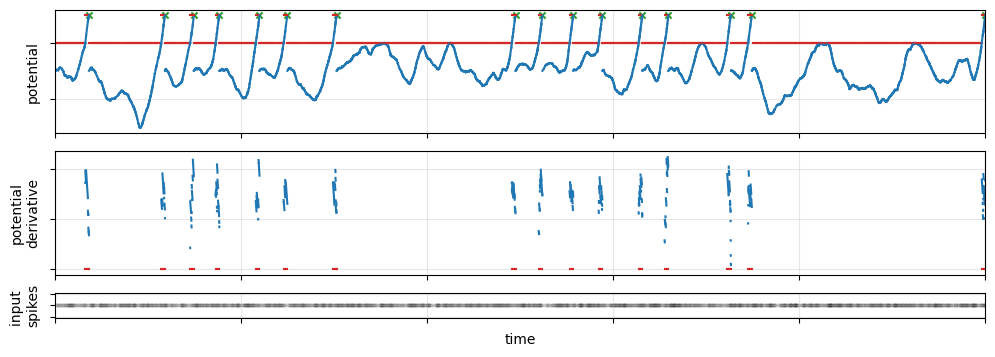

In [ ]:
fig, axes = plt.subplots(
    3,
    figsize=(12, 4),
    height_ratios=(1, 1, 0.2),
    sharex=True,
)

axes[0].set_xlim(f_times_0[0], f_times_0[-1])
axes[2].set_xlabel("time")
axes[0].set_ylabel("potential")
axes[1].set_ylabel("potential\nderivative")
axes[2].set_ylabel("input \nspikes")
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[2].grid(True, alpha=0.3)

axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[2].set_xticklabels([])
axes[2].set_yticklabels([])

for start, length, c0, c1, lim in zip(
    neuron.z_start, neuron.z_length, neuron.z_c0, neuron.z_c1, neuron.z_lim
):
    dt_vals = np.arange(0, length, 1e-3)
    t_vals = dt_vals + start
    y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
    axes[0].plot(t_vals, y_vals, linewidth=1.5, c="C0", label="__nolegend_")
    axes[0].plot(t_vals, np.full_like(t_vals, lim), c="C3", label="__nolegend_")

for start, length, c0, c1, lim in zip(
    neuron.dz_start, neuron.dz_length, neuron.dz_c0, neuron.dz_c1, neuron.dz_lim
):
    dt_vals = np.arange(0, length, 1e-3)
    t_vals = dt_vals + start
    y_vals = (c0 + c1 * dt_vals) * np.exp(-dt_vals)
    axes[1].plot(t_vals, -y_vals, linewidth=1.5, c="C0", label="__nolegend_")
    axes[1].plot(t_vals, np.full_like(t_vals, -lim), c="C3", label="__nolegend_")

axes[0].scatter(f_times_0[1:], np.full_like(f_times_0[1:], FIRING_THRESHOLD), marker="x", s=20, c="C2")

axes[2].scatter(in_times % period, np.zeros_like(in_times), s=5, color="black", label="_nolegend_", alpha=0.03)

# plt.tight_layout()
plt.show()

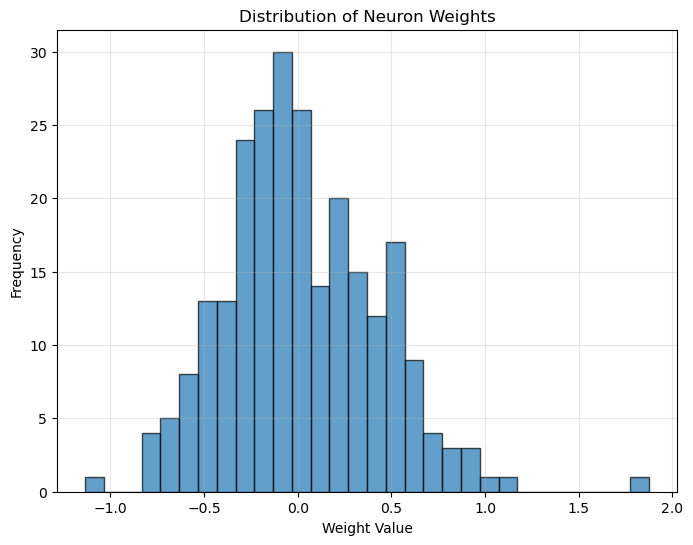

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(neuron.weight, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.title('Distribution of Neuron Weights')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
n_in_channels = 500
n_in_times = 1000
f_thresh = 1.0
zmax, dzmin = 0.0, 1.0
eps = 0.5
period = 10.0
f_time = 0.0
in_times = np.random.uniform(0.0, period, size=n_in_times)
in_channels = (np.random.randint(0, n_in_channels, size=n_in_times))

neuron = optim.Neuron()
neuron.init_solver(
        np.array([f_time]),
        in_times,
        in_channels,
        period=period,
        eps=eps,
        zmax=zmax,
        dzmin=dzmin,
        f_thresh=f_thresh
    )
neuron.learn()

NameError: name 'optim' is not defined

# Determining the critical points

In [ ]:
in_coef = np.random.randn(2, 5, 10) / np.sqrt(10)  # shape (2, n_inputs, n_intervals)
ends = np.random.uniform(0, 5, size=5)  # shape (n_intervals,)
weights = np.random.randn(10)  # shape (n_inputs,)
zmax = 0.0  # some threshold value
coef = np.inner(in_coef, weights)  # shape (2, n_intervals)

imax, tmax, vmax = critical_potential(coef, ends, zmax)

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for i in range(5):
    t_vals = np.linspace(0, ends[i], 1000)
    y_vals = (coef[0, i] + coef[1, i] * t_vals) * np.exp(-t_vals)
    
    axes[i].plot(t_vals, y_vals, 'b-', linewidth=2)
    axes[i].axhline(y=zmax, color='r', linestyle='--', alpha=0.7, label=f'zmax={zmax}')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel('Signal')
    axes[i].set_title(f'Interval {i+1}')
    axes[i].grid(True, alpha=0.3)
    # axes[i].set_xlim(0, ends[i])
    axes[i].legend()

axes[imax].axvline(tmax, color='black', linestyle='--', label=f'tmax={tmax:.2f}, vmax={vmax:.2f}')
axes[imax].legend()

plt.tight_layout()
plt.show()

NameError: name 'critical_potential' is not defined

In [ ]:
coef[:, 2]
ts = np.clip(1 - coef[0,2] / coef[1,2], 0.0, ends[2])  # t = 1 - c0 / c1, the clipping also handles the case c1 = 0
vs = np.maximum(coef[0,2], (coef[0,2] + coef[1,2] * ts) * np.exp(-ts))
ts, vs

(np.float64(0.02153725776080251), np.float64(2.03236525539423))

In [ ]:
a = ((in_coef[0, imax] + tmax * in_coef[1, imax]) * np.exp(-tmax)).reshape(1, -1)
b = np.array([zmax])

In [ ]:
from dataclasses import dataclass


@dataclass
class InSpike:
    conn_id: int
    time: float


period = 100.0

n_f_times = 3
f_times = np.random.uniform(0, 100, size=n_f_times)
f_times = np.sort(f_times)
s0 = f_times[0]
# f_times = np.concatenate(
#     (np.array([f_times[-1] - period]), f_times, np.array([f_times[0] + period]))
# )
f_times -= s0
starts = np.append(f_times, period)
# ends = np.roll(f_times, -1)
# ends[-1] = period
f_times, starts

(array([ 0.        , 38.60756882, 50.88000478]),
 array([  0.        ,  38.60756882,  50.88000478, 100.        ]))

In [ ]:
# note: make sure in_spikes are in [0, period]
n_inputs = 6
n_in_spikes = 5
in_spikes = [
    InSpike(conn_id=np.random.randint(0, n_inputs), time=np.random.uniform(0, period))
    for _ in range(n_in_spikes)
] 
in_spikes.sort(key=lambda x: x.time)
in_ids = np.array([spike.conn_id for spike in in_spikes])
in_times = np.array([spike.time for spike in in_spikes])
# in_times = np.array([(spike.time - s0) % period for spike in in_spikes])

# find the interval indices for each input spike time
in_int = np.searchsorted(starts, in_times, side='right') - 1

in_times, starts

(array([ 2.6875488 ,  6.16243931, 53.41486702, 63.2614007 , 81.01977437]),
 array([  0.        ,  38.60756882,  50.88000478, 100.        ]))

In [ ]:
# correspond to the first interval, now needs to compute the subintervals
in_times[in_int == 0], in_ids[in_int == 0], starts[0], starts[1]

(array([2.6875488 , 6.16243931]),
 array([4, 1]),
 np.float64(0.0),
 np.float64(38.60756882432332))

In [ ]:
# we first consider only one interval (0, s] where s is the desired firing time
# assume the neuron receives n_in_spikes spikes from n_inputs inputs during the interval [0, s)
# there are n_in_spikes intervals to consider
# in_times and in_channels are the spike times and their corresponding input indices
n_in_times = 5
n_in_channels = 4
f_time = 42.0

in_times = np.sort(np.random.uniform(0, f_time, size=n_in_times))
in_channels = np.random.randint(0, n_in_channels, size=n_in_times)  # random input channels for the spikes

# we assume the n_in_times are sorted
# and we have 0 <= t_i < s for all t_i in in_times
in_coef = np.zeros((2, n_in_times, n_in_channels))  # shape (n_inputs, 2)
tmp_ind = np.arange(n_in_times)
in_coef[1, tmp_ind, in_channels[tmp_ind]] += 1.0
for n in range(1, n_in_times):
    dt = in_times[n] - in_times[n - 1]
    in_coef[0,n] += (in_coef[0, n-1] + in_coef[0, n-1] * dt) * np.exp(-dt)
    in_coef[1,n] += in_coef[1, n-1] * np.exp(-dt)

ends = np.diff(in_times, append=f_time)

In [ ]:
def init_in_coef(f_times:np.ndarray, in_times:np.ndarray, in_channels:np.ndarray, n_in_channels:np.intp) -> np.ndarray:
    # now, consider many firing times, each having its own subintervals
    # period = 100.0
    # n_f_times = 3
    # f_times = np.sort(np.random.uniform(0, period, size=n_f_times))
    # n_in_times = 5
    # n_in_channels = 4
    # in_times = np.sort(np.random.uniform(0, f_times[-1], size=n_in_times))
    # in_channels = np.random.randint(0, n_in_channels, size=n_in_times)  # random input channels for the spikes

    # assume ti < f_times[-1] for every ti in_times
    f_times = np.sort(f_times) # not necessary??
    in_times = np.sort(in_times)

    in_coef = np.zeros((2, in_times.size, n_in_channels))  # shape (n_inputs, 2)
    
    # compute the insertion positions of the firing times in the input times array
    ipos = np.searchsorted(in_times, f_times, side='left')  # number of intervals for each firing time
    ipos = np.append(ipos, in_times.size)
    ipos = np.unique(ipos)

    print(f"f_times: {f_times}")
    print(f"in_times: {in_times}")
    print(f"in_channels: {in_channels}")

    n0 = 0
    for nmax in ipos:
        in_coef[1, n0, in_channels[n0]] = 1.0
        for n in range(n0+1, nmax):
            dt = in_times[n] - in_times[n - 1]
            in_coef[0,n] += (in_coef[0, n-1] + in_coef[1, n-1] * dt) * np.exp(-dt)
            in_coef[1,n] += in_coef[1, n-1] * np.exp(-dt)
            in_coef[1, n, in_channels[n]] += 1.0
        n0 = nmax


    # n_inter depends on the number of input spikes but also on the template itself 
    # we need to return:
    #  in_coef, an array with shape (2, n_inter, n_channels)
    #  zmax, an array with shape (n_inter)
    #  ends, an array with shape (n_inter)
    # all are computed from the template

    # 

    return in_coef

In [ ]:
eps = 10.0
period = 100.0
n_f_times = 5
n_in_times = 10

f_times = np.sort(np.random.uniform(0, period, size=n_f_times))
in_times = np.sort(np.random.uniform(0, f_times[-1], size=n_in_times))
bf_times = f_times - eps
print(f"bf_times: {bf_times}")
print(f"f_times: {f_times}")
print(f"in_times: {in_times}")

bf_times: [-8.17821464 16.84273824 31.8841312  45.79219783 76.65783549]
f_times: [ 1.82178536 26.84273824 41.8841312  55.79219783 86.65783549]
in_times: [ 0.49178469  3.1180875   7.14583659 25.74915188 34.08348035 64.30034582
 67.57301143 77.44500688 78.55799656 81.21936233]


In [ ]:
i = 1 # ith interval
b_indices = np.searchsorted(in_times, bf_times, side='left') - 1
indices = np.searchsorted(in_times, f_times, side='left') - 1
print(f"the {i}th interval [{bf_times[i]}, {f_times[i]}) overlaps the states induced by all in_times between {in_times[b_indices[i]]} and {in_times[indices[i]]}")

the 1th interval [16.842738235978658, 26.842738235978658) overlaps the states induced by all in_times between 7.145836589856869 and 25.74915187873333


# Input Signals Via Piecewise Fading Linear Functions

In [ ]:
# another alternative is to compute the coefficients one firing window at a time
from typing import Tuple
import numpy as np


def compute_in_states(
    f_time: np.float32,
    bf_time: np.float32,
    in_times: np.ndarray,
    in_channels: np.ndarray,
    n_in_channels: np.intp,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the coefficients (c0nk and c1nk) defining the states of every input (indexed by k) for any time between 0 and f_time, on disjoint intervals (indexed by n).
    The intervals partition the time range [0, f_time] in n_intervals = in_times.size + 3 intervals from the following time markers:
    - 0.0, the start of the time range
    - bf_time, the time before firing (the beginning of the active region)
    - f_time, the firing time
    - in_times, the input spike times.
    The intervals are reconstructed from their start and length.
    The signal (c0nk + c1nk * dt) * exp(-dt) for 0 <= dt < length[n] then corresponds to 
    a) the kth input signal on the nth interval [start[n], start[n] + length[n]) if start[n] + length[n] < bf_time.
    b) the derivative of the kth input signal on the nth interval [start[n], start[n] + length[n]) if start[n] + length[n] < f_time and start[n] >= f_time.
    c) the kth input signal on the nth interval [start[n], start[n] + length[n]) if start[n] = f_time.

    Args:
        f_time (np.float32): _description_
        bf_time (np.float32): _description_
        in_times (np.ndarray): _description_
        in_channels (np.ndarray): _description_
        n_in_channels (np.intp): _description_

    Returns:
        np.ndarray: the coefficients defining the input signals by parts with shape (2, n_intervals, n_channels)
        np.ndarray: the times at which the intervals start with shape (n_intervals)
        np.ndarray: the lengths the intervals, with shape (n_intervals)
    """
    # Extract the in_times and in_channels that are valid, i.e., within the range [0, f_time)
    valid = (in_times >= 0.0) & (in_times < f_time)
    in_times = in_times[valid]
    in_channels = in_channels[valid]

    # Initialize the starts array
    starts = np.concatenate((in_times, np.array([0.0, f_time, bf_time])))

    # Initialize the coefficients array
    in_coef = np.zeros((2, starts.size, n_in_channels))
    in_coef[1, np.arange(in_times.size), in_channels] = 1.0

    # Sort the coefficients according to their starts
    sort_ids = np.argsort(starts)
    starts = starts[sort_ids]
    lengths = np.diff(starts, append=f_time)  # time differences = lengths of the intervals
    # ends = starts + lengths

    in_coef = in_coef[:, sort_ids, :]
    for n in range(starts.size - 1):
        in_coef[1, n + 1] += in_coef[1, n] * np.exp(-lengths[n])
        in_coef[0, n + 1] += (in_coef[0, n] + in_coef[1, n] * lengths[n]) * np.exp(-lengths[n])

    # The signal of interest on the active region is the (negative) derivative
    active = (starts >= bf_time) & (starts < f_time)
    in_coef[0, active] -= in_coef[1, active]  # (negative) derivative

    return in_coef, starts, lengths

In [ ]:
f_time = 100.0
n_in_times = 50
n_in_channels = 5

in_times = np.random.uniform(0, f_time, size=n_in_times)
in_channels = np.random.randint(0, n_in_channels, size=n_in_times)

In [ ]:
bf_time = f_time
in_coef, starts, durations = compute_in_states(f_time, bf_time, in_times, in_channels, n_in_channels)

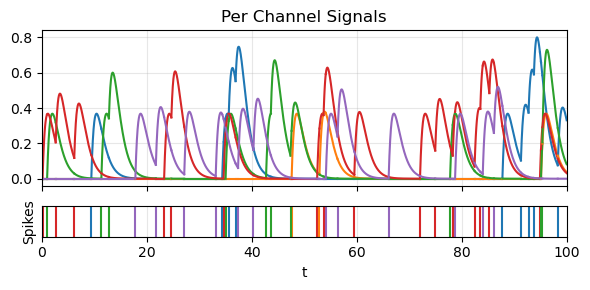

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True, height_ratios=(5, 1))

for n in range(in_coef.shape[1]):
    for k in range(n_in_channels):
        dt_vals = np.arange(0, durations[n], 1e-2)
        t_vals = dt_vals + starts[n]
        y_vals = (in_coef[0, n, k] + in_coef[1, n, k] * dt_vals) * np.exp(-dt_vals)
        axes[0].plot(t_vals, y_vals, c=f"C{k}", linewidth=1.5)
        

for n in range(in_times.size):
    axes[1].axvline(in_times[n], color=f'C{in_channels[n]}')

axes[1].set_xlabel('t')
axes[0].set_title('Per Channel Signals')
axes[1].set_ylabel('Spikes')
axes[1].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_xlim(0, 100.0)
# axes[1].legend([f"ch. {k+1}" for k in range(n_in_channels)], bbox_to_anchor=(0.5, -1.55), loc='upper center', ncol=5)

plt.tight_layout()
plt.show()

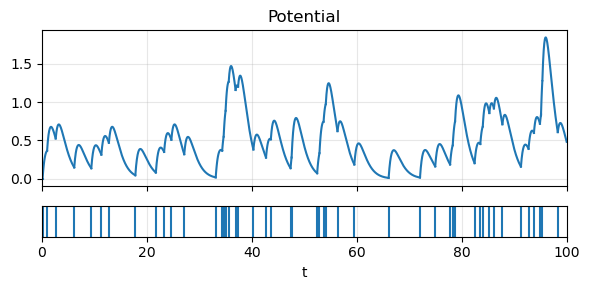

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True, height_ratios=(5, 1))

for n in range(in_coef.shape[1]):
    dt_vals = np.arange(0, durations[n], 1e-2)
    t_vals = dt_vals + starts[n]
    y_vals = (np.sum(in_coef[0, n]) + np.sum(in_coef[1, n]) * dt_vals) * np.exp(-dt_vals)
    axes[0].plot(t_vals, y_vals, c="C0", linewidth=1.5)
        

for n in range(in_times.size):
    axes[1].axvline(in_times[n], color='C0')

axes[1].set_xlabel('t')
axes[0].set_title('Potential')
axes[1].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_xlim(0, 100.0)

plt.tight_layout()
plt.show()

In [ ]:
bf_time = 0.0
in_coef, starts, durations = compute_in_states(f_time, bf_time, in_times, in_channels, n_in_channels)

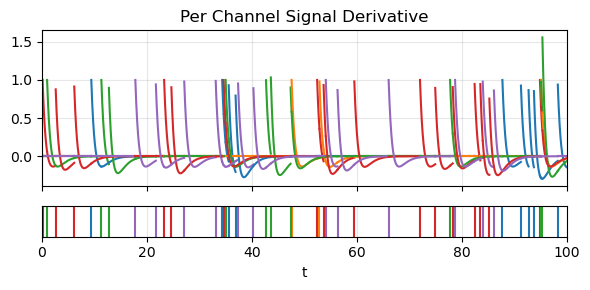

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True, height_ratios=(5, 1))

for n in range(in_coef.shape[1]):
    for k in range(n_in_channels):
        dt_vals = np.arange(0, durations[n], 1e-2)
        t_vals = dt_vals + starts[n]
        y_vals = -(in_coef[0, n, k] + in_coef[1, n, k] * dt_vals) * np.exp(-dt_vals)
        axes[0].plot(t_vals, y_vals, c=f"C{k}", linewidth=1.5)
        

for n in range(in_times.size):
    axes[1].axvline(in_times[n], color=f'C{in_channels[n]}')

axes[1].set_xlabel('t')
axes[0].set_title('Per Channel Signal Derivative')
axes[1].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_xlim(0, 100.0)
# axes[0].legend([f"ch. {k+1}" for k in range(n_in_channels)], bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=5)

plt.tight_layout()
plt.show()

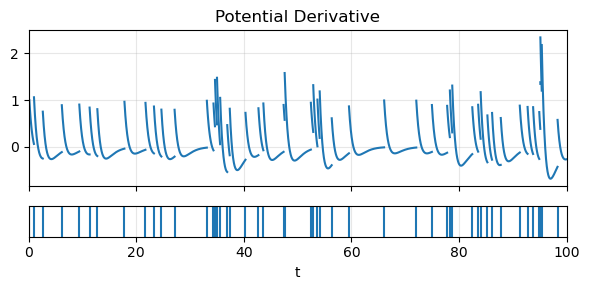

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True, height_ratios=(5, 1))

for n in range(in_coef.shape[1]):
    dt_vals = np.arange(0, durations[n], 1e-2)
    t_vals = dt_vals + starts[n]
    y_vals = -(np.sum(in_coef[0, n]) + np.sum(in_coef[1, n]) * dt_vals) * np.exp(-dt_vals)
    axes[0].plot(t_vals, y_vals, c="C0", linewidth=1.5)
        

for n in range(in_times.size):
    axes[1].axvline(in_times[n], color='C0')

axes[1].set_xlabel('t')
axes[0].set_title('Potential Derivative')
# axes[1].set_ylabel('Spikes')
axes[1].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_xlim(0, 100.0)

plt.tight_layout()
plt.show()

In [ ]:
def mod(x, modulus, offset=0.0):
    """
    Compute the modulo operation with a given modulus and offset.
    """
    return x - modulus * np.floor((x - offset) / modulus)

# for n in n_f_times:
#     tmp_in_times = ((in_times % period) + period) % period

x = np.linspace(0, 5, 10)
y = mod(x, 5.0, offset=-1.0)
x, y

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
         2.77777778,  3.33333333,  3.88888889, -0.55555556,  0.        ]))

In [ ]:
period = 100.0
eps = 1.0

n_f_times = 5
n_in_times = 50
n_in_channels = 6

f_times = np.sort(np.random.uniform(0, period, size=n_f_times))
in_times = np.random.uniform(0, period, size=n_in_times)
in_channels = np.random.randint(0, n_in_channels, size=n_in_times)  # random input channels for the spikes


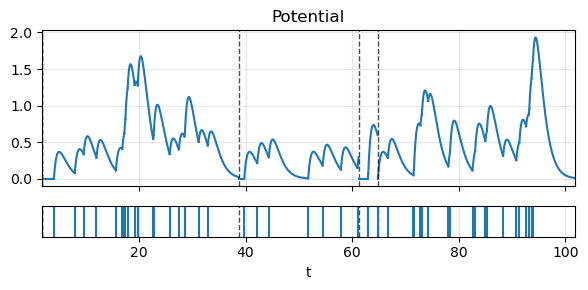

In [ ]:
# print(f"f_times: {f_times}")
# print(f"in_times: {in_times}")
# print(f"in_channels: {in_channels}")

fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True, height_ratios=(5, 1))

for n in range(n_f_times):
    f_time = (f_times[n] - f_times[n - 1]) % period
    bf_time = f_time - eps
    in_coef, starts, durations = compute_in_states(
        f_time,
        f_time,
        (in_times - f_times[n - 1]) % period,
        in_channels,
        n_in_channels,
    )

    for m in range(in_coef.shape[1]):
        dt_vals = np.arange(0, durations[m], 1e-2)
        t_vals = dt_vals + starts[m] + f_times[n - 1]
        y_vals = (np.sum(in_coef[0, m]) + np.sum(in_coef[1, m]) * dt_vals) * np.exp(-dt_vals)
        axes[0].plot(t_vals, y_vals, c="C0", linewidth=1.5)

    axes[0].axvline(f_times[n], color='black', linestyle='--', linewidth=1.0, alpha=0.7)
    axes[1].axvline(f_times[n], color='black', linestyle='--', linewidth=1.0, alpha=0.7)
        
for m in range(in_times.size):
    axes[1].axvline((in_times[m] - f_times[0])%period + f_times[0], color='C0')

axes[1].set_xlabel('t')
axes[0].set_title('Potential')
axes[1].set_yticks([])
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_xlim(f_times[0], f_times[0] + period)

plt.tight_layout()
plt.show()